<a href="https://colab.research.google.com/github/vicpb/data_science_analise_saude_medicina/blob/main/CursoDataScienceeSaude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,152722,152822,152960,153007,153033,153148,153220,153260,153306,153375,153395,153423,153534,153626,153736,153840,153962,153982,153990,154094,154180,154283,154361,154487,154487,154487,154585,154712,154757,154800,154960,154960,154960,155072,155093,155128,155174,155191,155191,155191
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,141365,142253,143174,144079,144847,145333,146387,147369,148222,149117,150101,150997,151499,152239,153318,154316,155293,156162,157026,157436,158431,159423,160365,161324,162173,162953,163404,164276,165096,165864,166690,167354,167893,168188,168782,169462,170131,170778,171327,171794
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,193171,193674,194186,194671,195162,195574,196080,196527,196915,197308,197659,198004,198313,198645,198962,199275,199560,199822,200068,200301,200528,200770,200989,201224,201425,201600,201766,201948,202122,202283,202449,202574,202722,202877,203045,203198,203359,203517,203657,203789
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15014,15016,15025,15025,15025,15032,15033,15046,15052,15055,15055,15055,15069,15070,15070,15078,15083,15083,15083,15096,15099,15108,15113,15124,15124,15124,15140,15140,15153,15156,15167,15167,15167,15189,15192,15209,15222,15222,15222,15222
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,46539,46726,46929,47079,47168,47331,47544,47781,48004,48261,48475,48656,48790,49114,49349,49628,49943,50348,50446,50738,51047,51407,51827,52208,52307,52307,52644,52968,53387,53840,54280,54795,55121,55583,56040,56583,56583,58076,58603,58943


In [2]:
confirmed.shape

(279, 625)

In [3]:
confirmed["Country/Region"]

0             Afghanistan
1                 Albania
2                 Algeria
3                 Andorra
4                  Angola
              ...        
274               Vietnam
275    West Bank and Gaza
276                 Yemen
277                Zambia
278              Zimbabwe
Name: Country/Region, Length: 279, dtype: object

In [4]:
last_date = "9/27/21"

In [5]:
confirmed[last_date]

0      155072
1      168188
2      202877
3       15189
4       55583
        ...  
274    766051
275    398946
276      8988
277    208867
278    129919
Name: 9/27/21, Length: 279, dtype: int64

In [6]:
confirmed["Country/Region"].unique

<bound method Series.unique of 0             Afghanistan
1                 Albania
2                 Algeria
3                 Andorra
4                  Angola
              ...        
274               Vietnam
275    West Bank and Gaza
276                 Yemen
277                Zambia
278              Zimbabwe
Name: Country/Region, Length: 279, dtype: object>

In [7]:
confirmed["Province/State"].unique

<bound method Series.unique of 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
274    NaN
275    NaN
276    NaN
277    NaN
278    NaN
Name: Province/State, Length: 279, dtype: object>

In [8]:
confirmed.sample(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21
236,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11347,11365,11365,11403,11403,11427,11436,11446,11446,11473,11473,11500,11526,11534,11571,11589,11606,11610,11610,11623,11755,11767,11790,11800,11805,11814,11831,11831,11861,11899,11926,11926,11948,11954,11981,11995,12010,12021,12035,12041
93,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4055,4055,4055,4062,4062,4065,4068,4072,4076,4083,4084,4086,4086,4090,4093,4093,4093,4094,4097,4100,4100,4100,4101,4104,4104,4106,4109,4110,4110,4112,4112,4112,4112,4128,4137,4137,4141,4147,4147,4155
167,NaN,Lesotho,-29.610000,28.233600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14388,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,21320,21338,21360
20,NaN,Bangladesh,23.685000,90.356300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1477930,1482628,1486153,1489589,1493537,1497261,1500618,1503680,1507116,1510283,1512026,1514456,1517166,1519805,1522302,1524890,1527215,1528542,1530413,1532366,1534440,1536341,1538203,1540110,1541300,1542683,1544238,1545800,1547176,1548320,1549553,1550371,1551351,1552563,1553873,1555051,1555911,1556758,1557347,1557964
32,NaN,Bulgaria,42.733900,25.485800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,446698,448431,450144,451148,451599,453689,455742,457487,459051,460691,461545,462033,462710,464715,466671,468300,469926,470835,471272,473270,475299,477161,478885,480777,481728,482186,484546,486738,487588,489423,491327,492365,492861,495397,497970,500112,502162,504253,505481,505994
47,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5989,5990,5999,5999,5999,6030,6031,6038,6042,6047,6047,6047,6047,6076,6090,6107,6117,6117,6117,6188,6254,6260,6294,6312,6312,6312,6367,6392,6411,6452,6486,6486,6486,6569,6598,6638,6638,6715,6715,6715
53,Saskatchewan,Canada,52.939900,-106.450900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,52845,53004,53262,53617,53875,54076,54367,54688,54953,55396,55750,56139,56533,56838,57243,57521,57952,58293,58715,59165,59673,60149,60589,61065,61558,62101,62620,62989,63415,63875,64402,64949,65501,65897,66343,66737,67339,67810,68290,68644
260,British Virgin Islands,United Kingdom,18.420700,-64.640000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2568,2568,2568,2568,2568,2568,2568,2568,2568,2640,2640,2640,2640,2640,2642,2642,2642,2642,2642,2642,2642,2642,2642,2642,2642,2642,2642,2642,2642,2642,2642,2642,2642,2642,2642,2642,2642,2642,2642,2642
134,NaN,Germany,51.165691,10.451526,0,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,27,...,3911562,3923250,3925190,3933585,3940212,3947035,3965681,3979839,3993789,3996688,4014858,4013808,4020587,4039667,4044777,4068495,4071643,4080180,4087125,4093412,4102252,4115342,4127158,4137062,4144165,4149832,4155160,4162437,4173357,4183672,4192606,4199029,4204300,4209098,4216507,4228774,4239773,4249061,4255543,4260494
154,NaN,Jamaica,18.109600,-77.297500,0,0,0,0

In [9]:
confirmed.iloc[0]

Province/State            NaN
Country/Region    Afghanistan
Lat                   33.9391
Long                    67.71
1/22/20                     0
                     ...     
9/29/21                155128
9/30/21                155174
10/1/21                155191
10/2/21                155191
10/3/21                155191
Name: 0, Length: 625, dtype: object

In [10]:
confirmed.iloc[1]

Province/State        NaN
Country/Region    Albania
Lat               41.1533
Long              20.1683
1/22/20                 0
                   ...   
9/29/21            169462
9/30/21            170131
10/1/21            170778
10/2/21            171327
10/3/21            171794
Name: 1, Length: 625, dtype: object

In [11]:
confirmed.set_index("Province/State").loc["Anhui"]

Country/Region      China
Lat               31.8257
Long              117.226
1/22/20                 1
1/23/20                 9
                   ...   
9/29/21              1008
9/30/21              1008
10/1/21              1008
10/2/21              1008
10/3/21              1008
Name: Anhui, Length: 624, dtype: object

In [12]:
#iloc localiza por linha
#loc localiza por idx

In [13]:
#valor falso pois o erro é muito grande
# não vou considerar essa análise pois tem muito campo vazio (muita disparidade no padrão)

confirmed["Country/Region"].value_counts()

China             34
Canada            16
United Kingdom    12
France            12
Australia          8
                  ..
Eswatini           1
Slovakia           1
Uruguay            1
Haiti              1
Montenegro         1
Name: Country/Region, Length: 195, dtype: int64

In [14]:
confirmed_by_country = confirmed.groupby("Country/Region").sum()
confirmed_by_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,...,152722,152822,152960,153007,153033,153148,153220,153260,153306,153375,153395,153423,153534,153626,153736,153840,153962,153982,153990,154094,154180,154283,154361,154487,154487,154487,154585,154712,154757,154800,154960,154960,154960,155072,155093,155128,155174,155191,155191,155191
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,141365,142253,143174,144079,144847,145333,146387,147369,148222,149117,150101,150997,151499,152239,153318,154316,155293,156162,157026,157436,158431,159423,160365,161324,162173,162953,163404,164276,165096,165864,166690,167354,167893,168188,168782,169462,170131,170778,171327,171794
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,193171,193674,194186,194671,195162,195574,196080,196527,196915,197308,197659,198004,198313,198645,198962,199275,199560,199822,200068,200301,200528,200770,200989,201224,201425,201600,201766,201948,202122,202283,202449,202574,202722,202877,203045,203198,203359,203517,203657,203789
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15014,15016,15025,15025,15025,15032,15033,15046,15052,15055,15055,15055,15069,15070,15070,15078,15083,15083,15083,15096,15099,15108,15113,15124,15124,15124,15140,15140,15153,15156,15167,15167,15167,15189,15192,15209,15222,15222,15222,15222
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,46539,46726,46929,47079,47168,47331,47544,47781,48004,48261,48475,48656,48790,49114,49349,49628,49943,50348,50446,50738,51047,51407,51827,52208,52307,52307,52644,52968,53387,53840,54280,54795,55121,55583,56040,56583,56583,58076,58603,58943


In [15]:
confirmed_by_country.loc["China"][2:]

1/22/20       548.0
1/23/20       643.0
1/24/20       920.0
1/25/20      1406.0
1/26/20      2075.0
             ...   
9/29/21    108413.0
9/30/21    108450.0
10/1/21    108495.0
10/2/21    108528.0
10/3/21    108555.0
Name: China, Length: 621, dtype: float64

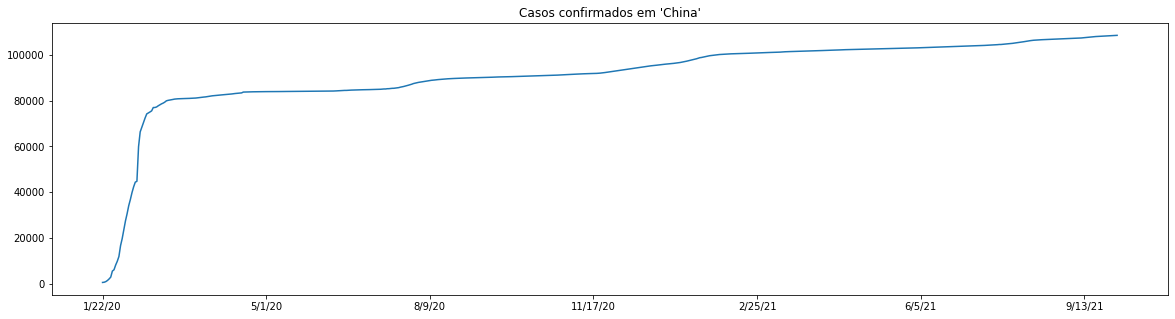

In [16]:
import matplotlib.pyplot as plt

# por isso em data visualization é FUNDAMENTAL
# estarmos atentos aos DOIS EIXOS
# esse aqui está tentando comparar o crescimento do momento inicial ao momento atual

plt.figure(figsize=(20, 5))
confirmed_by_country.loc["China"][2:].plot()
plt.title("Casos confirmados em 'China'")
plt.show()

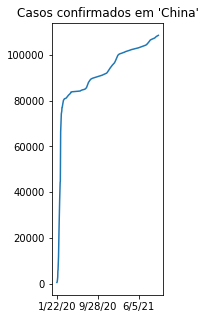

In [17]:
# gráfico extremamente apertado
# estamos sendo longo do adequado ao passar uma mensagem errada

plt.figure(figsize=(2, 5))
confirmed_by_country.loc["China"][2:].plot()
plt.title("Casos confirmados em 'China'")
plt.show()

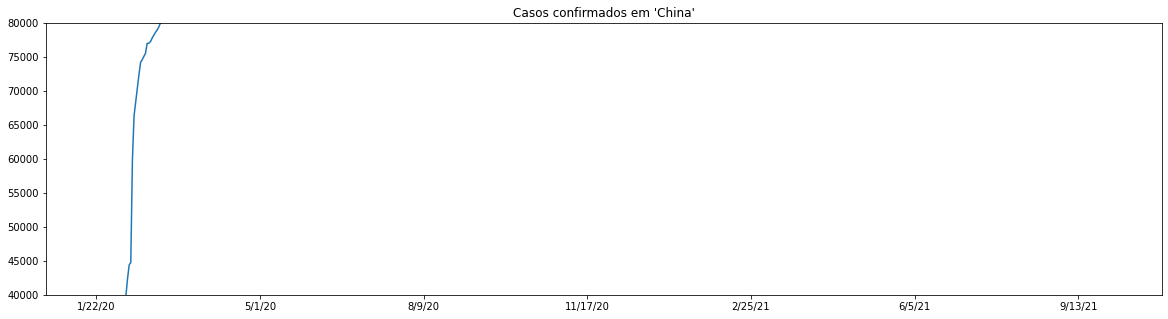

In [18]:
# exemplo ruim de manusear o eixo y

plt.figure(figsize=(20, 5))
confirmed_by_country.loc["China"][2:].plot()
plt.title("Casos confirmados em 'China'")
plt.ylim(40000, 80000)
plt.show()

# Nos últimos 20 dias desses dados, DOBROU os casos confirmados

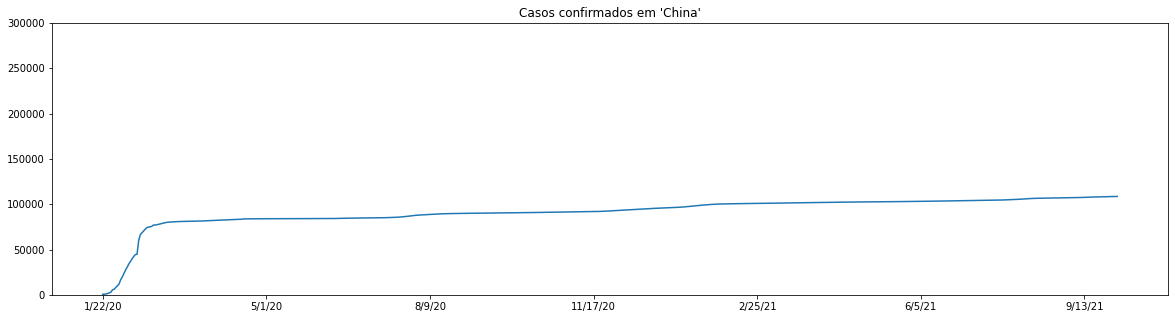

In [19]:
# exemplo ruim de manusear o eixo y
# aqui a mensagem ficou novamente diferente
# esse aqui está tentando comparar o crescimento do momento inicial com 300 mil

plt.figure(figsize=(20, 5))
confirmed_by_country.loc["China"][2:].plot()
plt.title("Casos confirmados em 'China'")
plt.ylim(0, 300000)
plt.show()

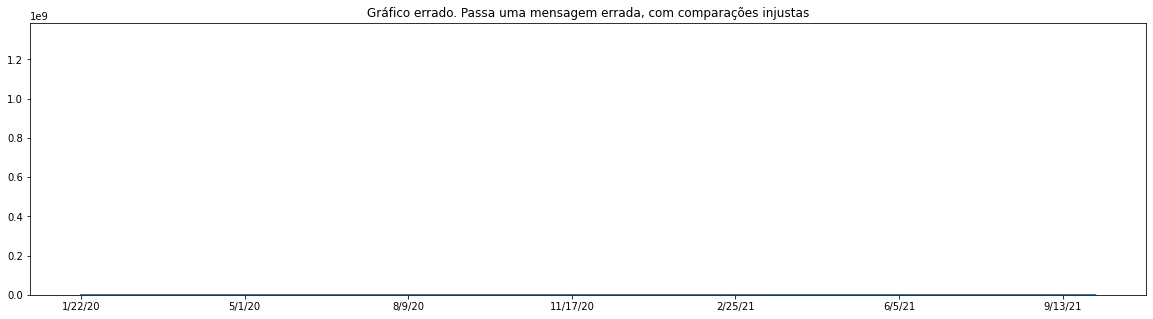

In [20]:
# exemplo ruim de manusear o eixo y
# aqui a mensagem ficou novamente diferente

# esse aqui está tentando comparar o crescimento do momento inicial com 1.386 bi (população da china em 2017)
# aqui a mensagem é novamente completamente diferente
# e pode ser uma mensagem errada, até mesmo errada. Poderia ser uma doença grava
# mas ao usarmos o eixo y com a população geral, fingimos que ela não é grave
# sendo que na realidade esse gráfico não POSSUI INFORMAÇÃO NENHUMA sobre a gravidade da doenã

# pq? só tem caso confirmado, não fala da letalidade, não fala da incidencia
# quais são as provincias infectadas? são da toda a china? estou comparando com a população toda da china. Errado!

plt.figure(figsize=(20, 5))
confirmed_by_country.loc["China"][2:].plot()
plt.title("Gráfico errado. Passa uma mensagem errada, com comparações injustas")
plt.ylim(0, 1386000000)
plt.show()

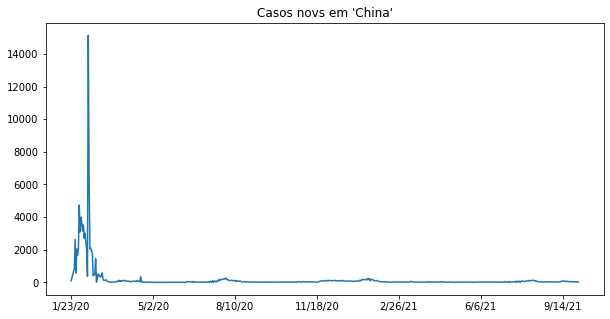

In [21]:
plt.figure(figsize=(10, 5))
plt.title("Casos novs em 'China'")
new_cases_china = confirmed_by_country.loc["China"][2:].diff().dropna()
new_cases_china.plot()

Text(0.5, 1.0, 'Confirmados por país')

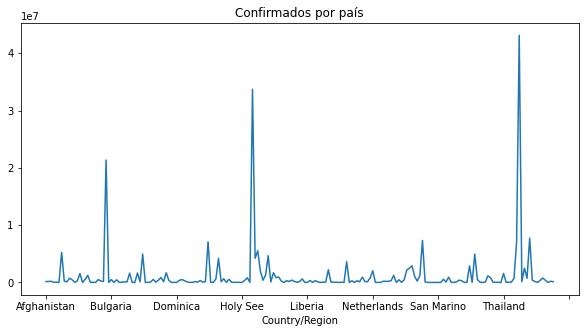

In [22]:
plt.figure(figsize=(10, 5))
confirmed_by_country[last_date].plot()
plt.title("Confirmados por país")

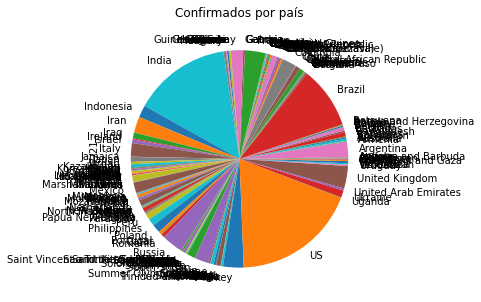

In [23]:
plt.figure(figsize=(10, 5))
# 99.99% das vezes não devemos usar gráfico de pizza e torta
# se o nome do gráfico não tem comida no meio, não use (boa prática)

# 1. muitas categorias, inviável
# 2. poucas categorias, a comparação é da área!

# ah, mas cai no 0.01% que é para usar torta/pizza
# não, não caiu. Pense novamente, se acredita que sim, pense novamente.
# se acredita que sim, assuma os riscos

confirmed_by_country[last_date].plot(kind='pie')
plt.title("Confirmados por país")
plt.show()

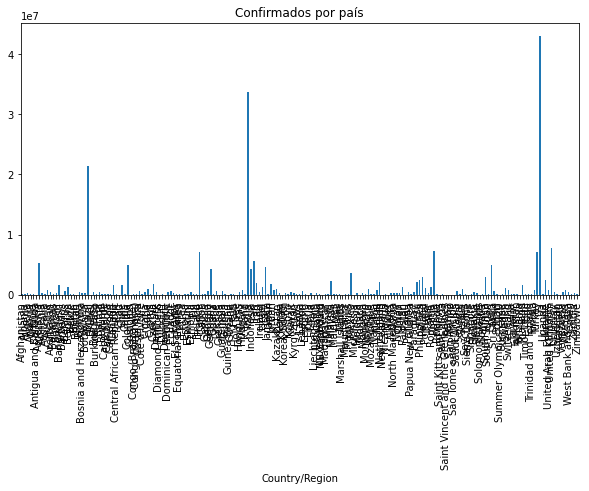

In [24]:
plt.figure(figsize=(10, 5))
confirmed_by_country[last_date].plot(kind='bar')
plt.title("Confirmados por país")
plt.show()

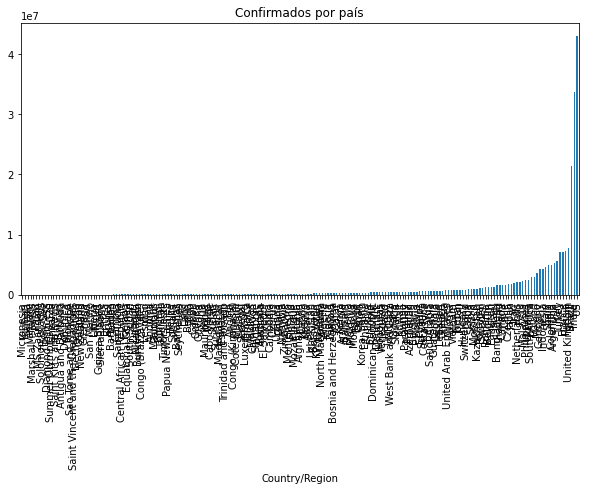

In [25]:
plt.figure(figsize=(10, 5))
confirmed_by_country[last_date].sort_values(ascending=True).plot(kind='bar')
plt.title("Confirmados por país")
plt.show()

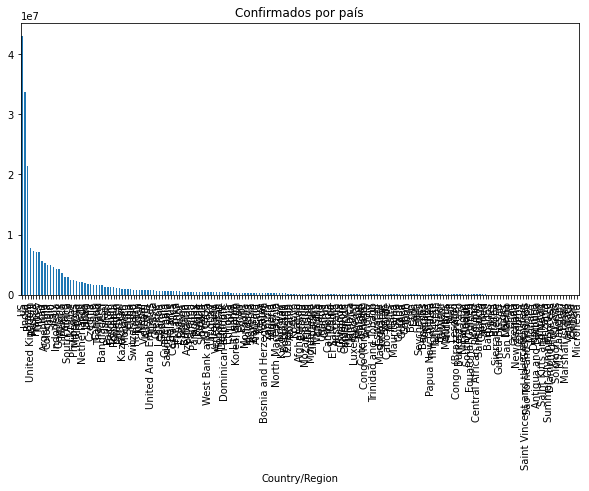

In [26]:
plt.figure(figsize=(10, 5))
confirmed_by_country[last_date].sort_values(ascending=False).plot(kind='bar')
plt.title("Confirmados por país")
plt.show()

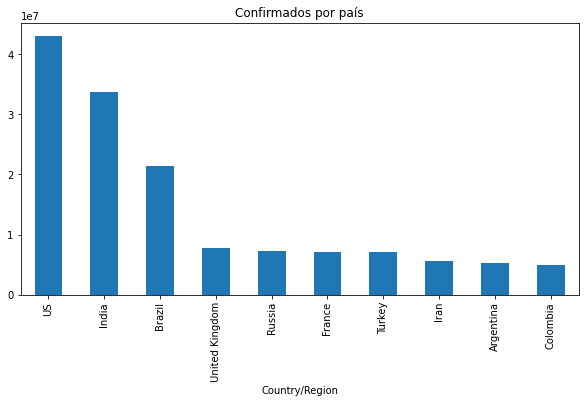

In [27]:
plt.figure(figsize=(10, 5))
confirmed_by_country[last_date].sort_values(ascending=False)[0:10].plot(kind='bar')
plt.title("Confirmados por país")
plt.show()

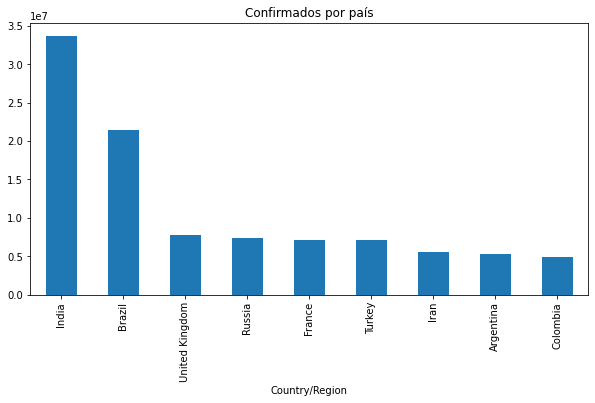

In [28]:
plt.figure(figsize=(10, 5))
confirmed_by_country[last_date].sort_values(ascending=False)[1:10].plot(kind='bar')
plt.title("Confirmados por país")
plt.show()

# Lembrando que existe um vício aqui pois paises que não testaram indivíduos
# podem sim ter casos ocorrendo mas não confirmados ainda.

In [29]:
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

display(deaths.head())
display(recovered.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7090,7093,7101,7103,7109,7116,7118,7123,7127,7127,7128,7132,7141,7144,7151,7157,7164,7167,7167,7169,7171,7174,7183,7186,7186,7186,7199,7199,7199,7199,7199,7199,7199,7200,7201,7204,7204,7206,7206,7206
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2483,2486,2487,2490,2492,2495,2498,2501,2505,2508,2512,2515,2519,2523,2528,2531,2535,2539,2543,2548,2553,2557,2563,2569,2574,2580,2587,2594,2601,2609,2619,2629,2640,2653,2668,2685,2698,2705,2710,2713
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5096,5121,5148,5179,5209,5240,5269,5302,5339,5373,5399,5420,5445,5471,5489,5519,5539,5558,5578,5596,5614,5630,5651,5670,5681,5694,5709,5725,5739,5748,5758,5767,5777,5786,5797,5805,5812,5815,5819,5822
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1176,1182,1186,1192,1201,1210,1217,1227,1235,1248,1258,1270,1282,1299,1309,1313,1322,1327,1339,1345,1358,1360,1371,1378,1388,1388,1409,1414,1434,1460,1471,1487,1501,1513,1526,1537,1537,1567,1574,1577


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
confirmed.groupby("Country/Region").sum()[last_date].head()

Country/Region
Afghanistan    155072
Albania        168188
Algeria        202877
Andorra         15189
Angola          55583
Name: 9/27/21, dtype: int64

In [31]:
deaths.groupby("Country/Region").sum()[last_date].head()

Country/Region
Afghanistan    7200
Albania        2653
Algeria        5786
Andorra         130
Angola         1513
Name: 9/27/21, dtype: int64

In [32]:
recovered.groupby("Country/Region").sum()[last_date].head()

Country/Region
Afghanistan    0
Albania        0
Algeria        0
Andorra        0
Angola         0
Name: 9/27/21, dtype: int64

In [33]:
def latest_by_country(data):
  return data.groupby("Country/Region").sum().iloc[:,-1]

display(latest_by_country(confirmed).head())
display(latest_by_country(deaths).head())
display(latest_by_country(recovered).head())

Country/Region
Afghanistan    155191
Albania        171794
Algeria        203789
Andorra         15222
Angola          58943
Name: 10/3/21, dtype: int64

Country/Region
Afghanistan    7206
Albania        2713
Algeria        5822
Andorra         130
Angola         1577
Name: 10/3/21, dtype: int64

Country/Region
Afghanistan    0
Albania        0
Algeria        0
Andorra        0
Angola         0
Name: 10/3/21, dtype: int64

In [34]:
informations = [latest_by_country(confirmed).head(), latest_by_country(deaths).head(), latest_by_country(recovered).head()]
combined = pd.concat(informations, axis=1)
combined.columns = ["confirmed", "deaths", "recovered"]

In [35]:
# taxa de letalidade é expressa em %
# o número de casos letais dentro dos casos que foram letais e não letais

# imagine que existe uma doença que em janeiro de 2020 afetou 100 pessoas
# 5 pessoas morreram (por exemplo). letalidade foi de 5%.
# e a doença deixou de existir pela história da humanidade
## -- não digo que ela é de 5% para sempre pq a doença continou existindo

# conclusão é MUITO dificil de falar de letalidade tentando ser preciso
# durante uma epidemia

# no começo é comum que somente casos graves sejam reportados

In [36]:
sum_up = combined.sum()
letality_rate_1 = sum_up["deaths"] / sum_up["confirmed"]
letality_rate_2 = sum_up["deaths"] / (sum_up["deaths"] + sum_up["recovered"])
print(letality_rate_1 * 100)
print(letality_rate_2 * 100)

2.8842577516080135
100.0


In [37]:
letality_rate_1 = combined["deaths"] / combined["confirmed"] * 100
letality_rate_2 = combined["deaths"] / (combined["recovered"] + combined["deaths"]) * 100
combined["letality_rate_1"] = letality_rate_1
combined["letality_rate_2"] = letality_rate_2
combined.head()

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,155191,7206,0,4.643311,100.0
Albania,171794,2713,0,1.579217,100.0
Algeria,203789,5822,0,2.856876,100.0
Andorra,15222,130,0,0.854027,100.0
Angola,58943,1577,0,2.675466,100.0


In [38]:
combined.sort_values("letality_rate_1", ascending=False).head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,155191,7206,0,4.643311,100.0
Algeria,203789,5822,0,2.856876,100.0
Angola,58943,1577,0,2.675466,100.0
Albania,171794,2713,0,1.579217,100.0
Andorra,15222,130,0,0.854027,100.0


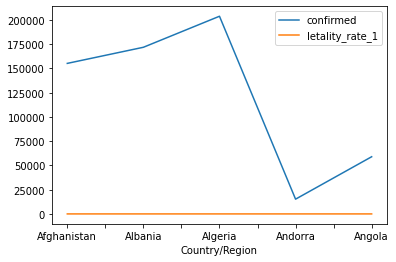

In [40]:
# visualização horrenda
combined[["confirmed", "letality_rate_1"]].plot()

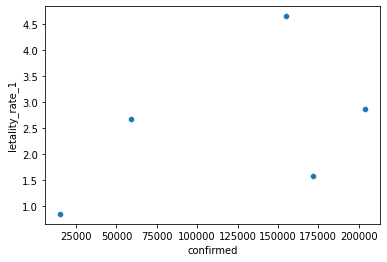

In [41]:
import seaborn as sns

sns.scatterplot(data = combined, x="confirmed", y="letality_rate_1")

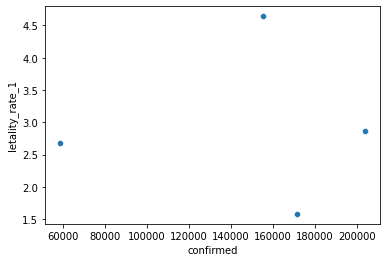

In [44]:
sns.scatterplot(data = combined.query("confirmed > 17500"), x="confirmed", y="letality_rate_1")

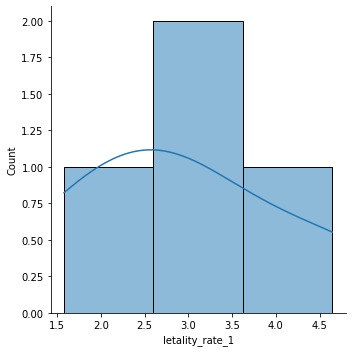

In [47]:
sns.displot(combined.query("confirmed > 17500")["letality_rate_1"], kde=True)

In [52]:
combined.sort_values("letality_rate_1", ascending=False).query("confirmed > 120").head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,155191,7206,0,4.643311,100.0
Algeria,203789,5822,0,2.856876,100.0
Angola,58943,1577,0,2.675466,100.0
Albania,171794,2713,0,1.579217,100.0
Andorra,15222,130,0,0.854027,100.0
